# ***Support Vector Machine***

### ***Support Vector Classifier***

***Importing the necessary libraries***

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

***Loading the iris dataset for support vector classifier***

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [5]:
df = pd.DataFrame(data.data, columns =data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


***Splitting the data into two parts i.e. dependent variables and independent variables***

In [10]:
X = df
y = data.target

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

***Here, we are transforming the dependent variables into standard scale***

In [16]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler().fit_transform(X)

***Dividing the data into training data and  testing data***

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size =0.30, random_state=30)

In [19]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

***Training the SCV model with the help of training data**

In [21]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [22]:
classifier.score(X_test, y_test)

0.9333333333333333

***Our model is now trained, now I want to predict the dependent variable using the testing data***

In [24]:
y_hat = classifier.predict(X_test)

***Here, we are going to check the score of our prediction***

In [26]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_hat, y_test)
print(score)

0.9333333333333333


In [29]:
class_report = classification_report(y_hat, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.92      0.88        12
           2       0.95      0.90      0.92        20

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



***We are now trying to create the confussion matrix and then using that confusion matrix to create the heatmap***

[[13  0  0]
 [ 0 11  1]
 [ 0  2 18]]


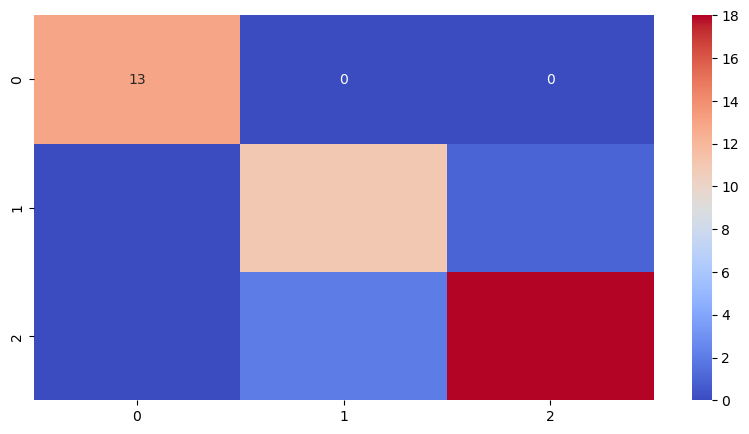

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_hat, y_test)
print(cm)
plt.figure(figsize=(10, 5))
sns.heatmap(data=cm, annot=True, cmap="coolwarm", fmt=".2g")
plt.show()

### ***Support Vector Regressor***

***In this section, I am going to use the support vector machine for the regression also***

***First we are going to load the boston dataset from sklearn library and then we are going to use the same library for the model training and testing purpose***

In [70]:
from sklearn.datasets import load_boston
data = load_boston()
data

c:\Anaconda\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [72]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


***We are converting the whole dataset into predictor and target variables***

In [73]:
X = df
y = data.target

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

***Transfprming our independent variables into the standard scale***

In [76]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler().fit_transform(X)
standard_X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

***Now, we are dividing the dataset into training and testing data so thet we can train and test our model using the same data***

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size=0.3, random_state=40)

In [78]:
from sklearn.svm import SVR
regressor = SVR()

***Here, we are doing hyperparameter tunning to get the best result***

In [87]:
from sklearn.model_selection import GridSearchCV
paramaters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
}
reg = GridSearchCV(regressor, param_grid=paramaters, scoring="accuracy", cv=10)
reg.fit(X_train, y_train)

c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "c:\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
                             ^^^^^^^^^^^^^^^^^

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [88]:
reg.best_params_

{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}

In [89]:
reg.best_score_

nan

***Our model is trained now and is ready to predict the data using the testing variables***

In [99]:
y_hat = reg.predict(X_test)
y_hat

array([20.61836488, 32.02309903, 11.45754509, 15.20429759, 16.36053962,
       27.00302318, 26.19746358, 16.50852921, 22.09266279, -2.37150606,
       23.96922334, 16.11675371,  6.11666988,  5.75079255, 24.5654675 ,
       32.12770344, 23.27687405, 18.25147366, 22.77011534, 15.07576332,
       37.28913135, 11.1952017 , 34.94758912, 24.92730953, 36.31135611,
       26.5776077 , 21.32271908, 19.32801654, 18.94239869, 19.54671889,
       23.55923667, 23.087795  , 28.12996536, 25.11671509,  1.24227917,
       24.29709273, 24.54304329, 11.87279886, 37.37367104, 29.17759199,
       23.3487135 ,  8.11453299, 19.30333422, 20.91111631, 28.69370958,
        8.22542641, 13.42393709, 30.04944803, 17.17206631, 33.30518478,
       14.77844445, 21.13600144, 16.77642786,  8.67072164,  6.43759469,
       38.00755738, 23.0157336 , 22.2807671 , 22.05663102, 10.36156721,
       22.34838843,  9.89617398, 30.42008088, 14.51061932, 25.65148778,
       16.65384131,  6.43066417, 27.88182816, 18.66078545, 17.60

***Now, the predictions are done and we are now going to find the score so that we can know that how our model is performing and it can be deployed or not***

In [98]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_hat)
print(score)

0.6624110696327313
